## 0. 起始準備 （Colab 連接雲端硬碟) -- 此範例可省略

In [ ]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/class_AI/dataset_cifar100/
!pwd
!ls

## 1. 取得及認識資料

In [49]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.4.1


In [51]:
# 方法一
cifar100 = tf.keras.datasets.cifar100

(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

In [52]:
# 方法二
from keras.datasets import cifar100

(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

In [53]:
## 查看數量及結構
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [54]:
## 查看內容
# print(X_train[0])
print(Y_train[:10])


[[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]
 [31]]


## 2. 查看圖形

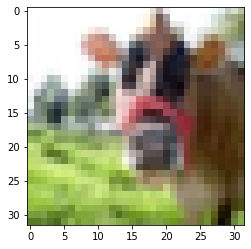

In [55]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

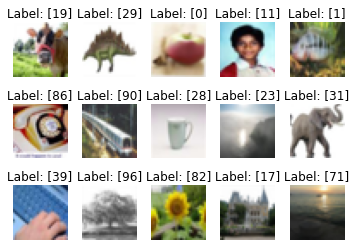

In [56]:
# 顯示最前面的圖片
for i in range(0, 15):
    ax = plt.subplot(3, 5, i+1)
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: ' + str(Y_train[i]))
    ax.axis('off')
plt.subplots_adjust(hspace = .5)

# 顯示數字圖片
plt.show()


## 3. 進一步分析資料

In [57]:
# print(np.unique(Y_train))  ## 查看不重覆的項目

b, c = np.unique(Y_train, return_index=False, return_counts=True, return_inverse=False)
print('不重覆的元素：', b)
print('各元素的數量：', c)


不重覆的元素： [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
各元素的數量： [500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500]


In [58]:
# 針對物件圖像數據集的類別編列成字典
# pyplot 不能用中文

label_list = [
'1a海貍', '1b海豚', '1c水獺', '1d海豹', '1e鯨魚',
'2a水族館的魚', '2b比目魚', '2c射線', '2d鯊魚', '2e鱒魚',
'3a蘭花', '3b罌粟花', '3c玫瑰', '3d向日葵', '3e郁金香',
'4a瓶子', '4b碗', '4c罐子', '4d杯子', '4e盤子',
'5a蘋果', '5b蘑菇', '5c橘子', '5d梨', '5e甜椒',
'6a時鐘', '6b電腦鍵盤', '6c臺燈', '6d電話機', '6e電視機',
'7a床', '7b椅子', '7c沙發', '7d桌子', '7e衣櫃',
'8a蜜蜂', '8b甲蟲', '8c蝴蝶', '8d毛蟲', '8e蟑螂',
'9a熊', '9b豹', '9c獅子', '9d老虎', '9e狼',
'10a橋', '10b城堡', '10c房子', '10d路', '10e摩天大樓',
'11a雲', '11b森林', '11c山', '11d平原', '11e海',
'12a駱駝', '12b牛', '12c黑猩猩', '12d大象', '12e袋鼠',
'13a狐貍', '13b豪豬', '13c負鼠', '13d浣熊', '13e臭鼬',
'14a螃蟹', '14b龍蝦', '14c蝸牛', '14d蜘蛛', '14e蠕蟲',
'15a寶貝', '15b男孩', '15c女孩', '15d男人', '15e女人',
'16a鱷魚', '16b恐龍', '16c蜥蜴', '16d蛇', '16e烏龜',
'17a倉鼠', '17b老鼠', '17c兔子', '17d母老虎', '17e松鼠',
'18a楓樹', '18b橡樹', '18c棕櫚', '18d松樹', '18e柳樹',
'19a自行車', '19b公共汽車', '19c摩托車', '19d皮卡車', '19e火車',
'20a割草機', '20b火箭', '20c有軌電車', '20d坦克', '20e拖拉機' ]

label_dict = {}
for i in range(100):
  label_dict[i] = label_list[i]

print(label_dict)

{0: '1a海貍', 1: '1b海豚', 2: '1c水獺', 3: '1d海豹', 4: '1e鯨魚', 5: '2a水族館的魚', 6: '2b比目魚', 7: '2c射線', 8: '2d鯊魚', 9: '2e鱒魚', 10: '3a蘭花', 11: '3b罌粟花', 12: '3c玫瑰', 13: '3d向日葵', 14: '3e郁金香', 15: '4a瓶子', 16: '4b碗', 17: '4c罐子', 18: '4d杯子', 19: '4e盤子', 20: '5a蘋果', 21: '5b蘑菇', 22: '5c橘子', 23: '5d梨', 24: '5e甜椒', 25: '6a時鐘', 26: '6b電腦鍵盤', 27: '6c臺燈', 28: '6d電話機', 29: '6e電視機', 30: '7a床', 31: '7b椅子', 32: '7c沙發', 33: '7d桌子', 34: '7e衣櫃', 35: '8a蜜蜂', 36: '8b甲蟲', 37: '8c蝴蝶', 38: '8d毛蟲', 39: '8e蟑螂', 40: '9a熊', 41: '9b豹', 42: '9c獅子', 43: '9d老虎', 44: '9e狼', 45: '10a橋', 46: '10b城堡', 47: '10c房子', 48: '10d路', 49: '10e摩天大樓', 50: '11a雲', 51: '11b森林', 52: '11c山', 53: '11d平原', 54: '11e海', 55: '12a駱駝', 56: '12b牛', 57: '12c黑猩猩', 58: '12d大象', 59: '12e袋鼠', 60: '13a狐貍', 61: '13b豪豬', 62: '13c負鼠', 63: '13d浣熊', 64: '13e臭鼬', 65: '14a螃蟹', 66: '14b龍蝦', 67: '14c蝸牛', 68: '14d蜘蛛', 69: '14e蠕蟲', 70: '15a寶貝', 71: '15b男孩', 72: '15c女孩', 73: '15d男人', 74: '15e女人', 75: '16a鱷魚', 76: '16b恐龍', 77: '16c蜥蜴', 78: '16d蛇', 79: '16e烏龜', 80: '17a倉鼠', 

In [59]:

label_list = [
'1a', '1b', '1c', '1d', '1e',
'2a', '2b', '2c', '2d', '2e',
'3a', '3b', '3c', '3d', '3e',
'4a', '4b', '4c', '4d', '4e',
'5a', '5b', '5c', '5d', '5e',
'6a', '6b', '6c', '6d', '6e',
'7a', '7b', '7c', '7d', '7e',
'8a', '8b', '8c', '8d', '8e',
'9a', '9b', '9c', '9d', '9e',
'10a', '10b', '10c', '10d', '10e',
'11a', '11b', '11c', '11d', '11e',
'12a', '12b', '12c', '12d', '12e',
'13a', '13b', '13c', '13d', '13e',
'14a', '14b', '14c', '14d', '14e',
'15a', '15b', '15c', '15d', '15e',
'16a', '16b', '16c', '16d', '16e',
'17a', '17b', '17c', '17d', '17e',
'18a', '18b', '18c', '18d', '18e',
'19a', '19b', '19c', '19d', '19e',
'20a', '20b', '20c', '20d', '20e' ]

label_dict = {}
for i in range(100):
  label_dict[i] = label_list[i]

print(label_dict)

{0: '1a', 1: '1b', 2: '1c', 3: '1d', 4: '1e', 5: '2a', 6: '2b', 7: '2c', 8: '2d', 9: '2e', 10: '3a', 11: '3b', 12: '3c', 13: '3d', 14: '3e', 15: '4a', 16: '4b', 17: '4c', 18: '4d', 19: '4e', 20: '5a', 21: '5b', 22: '5c', 23: '5d', 24: '5e', 25: '6a', 26: '6b', 27: '6c', 28: '6d', 29: '6e', 30: '7a', 31: '7b', 32: '7c', 33: '7d', 34: '7e', 35: '8a', 36: '8b', 37: '8c', 38: '8d', 39: '8e', 40: '9a', 41: '9b', 42: '9c', 43: '9d', 44: '9e', 45: '10a', 46: '10b', 47: '10c', 48: '10d', 49: '10e', 50: '11a', 51: '11b', 52: '11c', 53: '11d', 54: '11e', 55: '12a', 56: '12b', 57: '12c', 58: '12d', 59: '12e', 60: '13a', 61: '13b', 62: '13c', 63: '13d', 64: '13e', 65: '14a', 66: '14b', 67: '14c', 68: '14d', 69: '14e', 70: '15a', 71: '15b', 72: '15c', 73: '15d', 74: '15e', 75: '16a', 76: '16b', 77: '16c', 78: '16d', 79: '16e', 80: '17a', 81: '17b', 82: '17c', 83: '17d', 84: '17e', 85: '18a', 86: '18b', 87: '18c', 88: '18d', 89: '18e', 90: '19a', 91: '19b', 92: '19c', 93: '19d', 94: '19e', 95: '20a'

In [60]:
# 導入影像列印模組
import matplotlib.pyplot as plt

# 宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

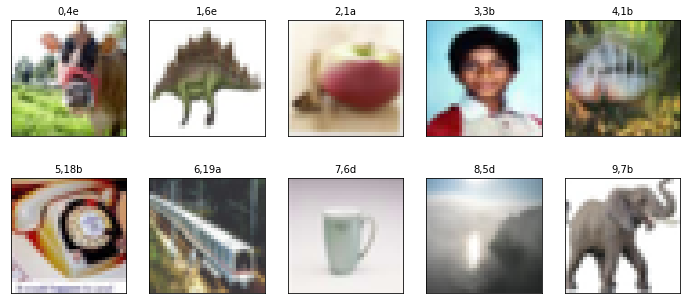

In [61]:
# 針對不同的影像作標記

plot_images_labels_prediction(X_train, Y_train, [], 0)

## 4. 影像正規化

In [62]:
X_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [63]:
# 影像正規化
X_train_normalize = X_train.astype('float32') / 255.0
X_test_normalize = X_test.astype('float32') / 255.0

In [64]:
X_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

## 5. 轉換 label 為 OneHot Encoding

In [65]:
print(Y_train.shape)

(50000, 1)


In [66]:
Y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [67]:
# 轉換 label 為 OneHot Encoding
from keras.utils import np_utils
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)

In [68]:
print(Y_train_onehot.shape)
print(Y_test_onehot.shape)

(50000, 100)
(10000, 100)


In [69]:
print(Y_train[:5])
Y_train_onehot[:5]

[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

## 6. 提供給深度學習用之資料準備

In [71]:
import numpy as np
import tensorflow as tf

cifar100 = tf.keras.datasets.cifar100

# 取得訓練及測試資料
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

# 影像正規化
X_train_normalize = X_train.astype('float32') / 255.0
X_test_normalize = X_test.astype('float32') / 255.0

# 轉換 label 為 OneHot Encoding
from keras.utils import np_utils
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)